Make sure you use the right version number.

In [24]:
# %pip install --upgrade scikit-learn==0.23.0

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

%matplotlib inline

plt.style.use('seaborn') # whitegrid

Once installed, we can load the data.

In [25]:
X, y = load_boston(return_X_y=True)  # type: ignore 

C:\Users\Vadim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

Next, we can apply models! 

In [26]:
mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([30.00384338, 25.02556238, 30.56759672])

In [27]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([21.78, 22.9 , 25.36])

Maybe we should inspect the results.

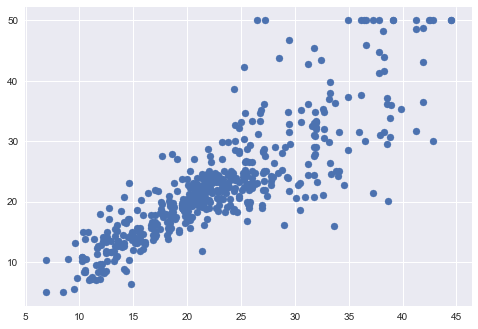

In [28]:
pred = mod.predict(X)
plt.scatter(pred, y)

Let's put everything into a pipeline.

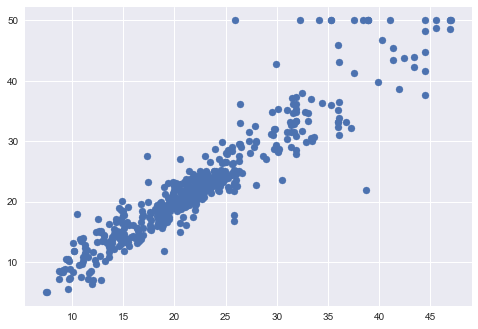

In [29]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

In [30]:
# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params()


{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

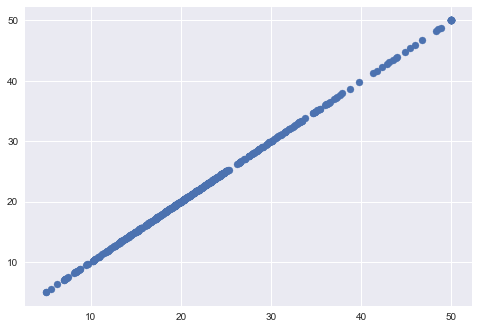

In [31]:
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [32]:
mod = GridSearchCV(
    estimator=pipe,
    param_grid={"model__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    cv=3,
)
mod.fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [33]:
cv_results = pd.DataFrame(mod.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001667,0.000472,0.001894,0.000153,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001748,0.001059,0.002011,0.000013,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.002005,0.000816,0.002990,0.000817,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001361,0.000506,0.002867,0.000663,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002331,0.001244,0.003367,0.000456,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001673,0.000473,0.003329,0.000465,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000386,0.000546,0.000000,0.000000,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001008,0.000819,0.007314,0.007522,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001667,0.000471,0.002702,0.001205,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001327,0.000468,0.002938,0.000742,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


Text(0, 0.5, 'Mean Score')

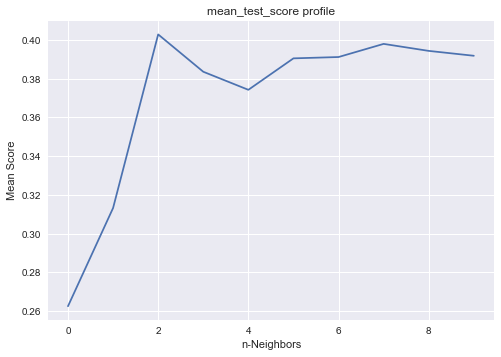

In [37]:
plt.plot(cv_results.mean_test_score)
plt.title("mean_test_score profile")
plt.xlabel("n-Neighbors")
plt.ylabel("Mean Score")

Finally, lets remember that we should look at the data.

In [35]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\Vadim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar